In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [107]:
# 1.读取数据，输出需要信息
def read_file():
    # 文件路径，直接文件属性面板中复制即可
    path = input('请输入目标文件路径：').replace('\\','\\\\') + '\\\\'
    folder = os.walk(path)         #获取文件所在路径信息，结果为生成器，后续操作转换为列表索引
    for i in list(folder)[0][2]:
        if i[-5:] == '.xlsx':          #判别是否为xlsx文件
            filepath = path + i
            data = pd.read_excel(filepath,index_col=0)
            data_count = len(data)
            columns = data.columns.tolist()
            nan_data = data[data.isnull().values == True]
            nan_count = len(nan_data)
            print('\n文件 %s 总共有%i条数据'%(i.split('.')[0],data_count))
            print('其数据字段为 :%s'%columns)
            print('共有 %d 条缺失值\n'%nan_count)
    return('数据读取已完成')
print('运行函数read_file(),读取目标文件夹数据，输出所需字段')
read_file()

运行函数read_file(),读取目标文件夹数据，输出所需字段
请输入目标文件路径：C:\Users\Vodka\Desktop\Project_03\data

文件 data01 总共有31条数据
其数据字段为 :['productA', 'productB']
共有 3 条缺失值


文件 data02 总共有28条数据
其数据字段为 :['productA', 'productB']
共有 4 条缺失值


文件 data03 总共有31条数据
其数据字段为 :['productA', 'productB']
共有 3 条缺失值



'数据读取已完成'

运行函数data_clean()，得到清洗后数据

运行函数data_plot(),得到AB产品销量柱状图及每月总销量情况
运行函数data_find(),找到A产品销量超过月度80%的日期


['2018-01-26 00:00:00', '2018-02-23 00:00:00', '2018-03-25 00:00:00']

<Figure size 432x288 with 0 Axes>

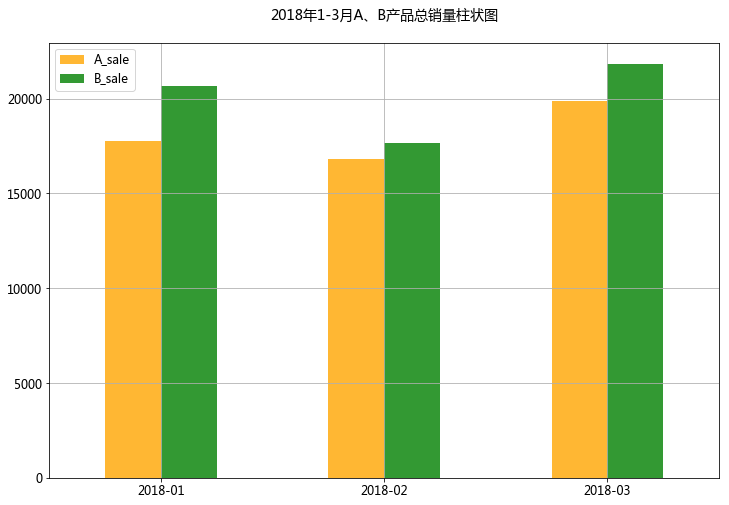

In [108]:
#2.批量读取数据，用均值填充缺失值数据，并完成以下计算及图表制作

def data_clean():
    path = 'C:\\Users\\Vodka\\Desktop\\Project_03\\data\\'
    folder = os.walk(path)
    data_files = []
    for i in list(folder)[0][2]:
        if i[-5:] == '.xlsx':
            filepath = path + i
            data = pd.read_excel(filepath,index_col=0)
            columns = data.columns.tolist()
            for column in columns: 
                data[column].fillna(data[column].mean(),inplace = True)
            data.index.to_period()
            data_files.append(data)
    return(data_files)

def data_plot():
    path = 'C:\\Users\\Vodka\\Desktop\\Project_03\\data\\'
    A_product = []
    B_product = []
    for data in data_clean():
        A_product_sum = data['productA'].sum()
        B_product_sum = data['productB'].sum()
        A_product.append(A_product_sum)
        B_product.append(B_product_sum)
    df = pd.DataFrame({'A_sale':A_product,'B_sale':B_product},
                     index = pd.period_range('201801','201803',freq='M'))
    figure = plt.figure()
    df.plot(kind='bar',figsize=(12,8),rot=0,
            fontsize=12,color=['orange','green'],
            grid=True,alpha=0.8)
    plt.legend(loc='best',fontsize=12)
    plt.title('2018年1-3月A、B产品总销量柱状图\n',fontsize=14)
    plt.savefig(path + '2018年1-3月A,B产品总销量柱状图.png')
    df = pd.DataFrame({'A_product':A_product,
                      'B_product':B_product},
                      index = pd.period_range('201801','201803',freq='M'))
    return(df)

def data_find():
    data_date = []
    for data in data_clean():
        column = data.columns[0]
        data['A_sale%'] = data[column].cumsum() / data[column].sum()
        data_index = data[data['A_sale%'] > 0.8].index[0]
        data_date.append(str(data_index))
    #print(data_date)
    return(data_date)

print('运行函数data_clean()，得到清洗后数据\n')
data_clean()

print('运行函数data_plot(),得到AB产品销量柱状图及每月总销量情况')
data_plot()

print('运行函数data_find(),找到A产品销量超过月度80%的日期')
data_find()

运行函数data_concat(),删除缺失值后得到清洗合并之后的数据
运行函数data_predict()后，得到预测值并生成散点及拟合直线图


1303.8419330868069

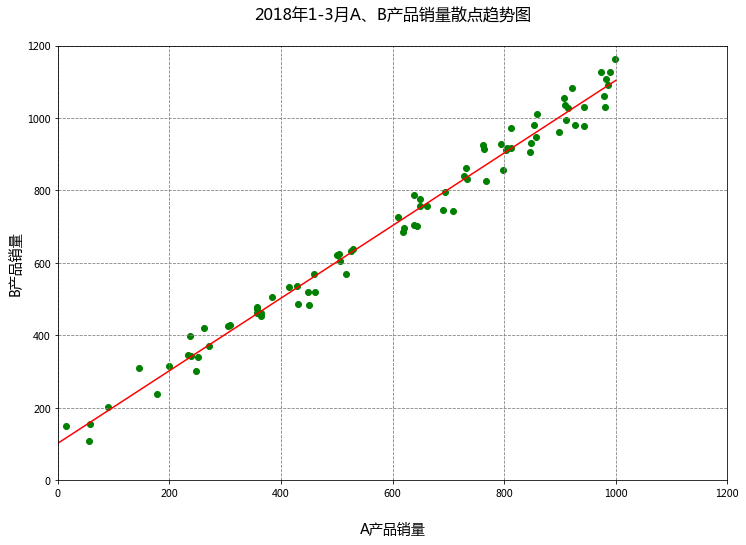

In [109]:
# 3、读取数据并合并，做散点图观察A,B产品销量，并做回归，预测当A销量为1200时，B产品销量值

def data_concat():
    path = 'C:\\Users\\Vodka\\Desktop\\Project_03\\data\\'
    folder = os.walk(path)
    data_files = []
    for i in list(folder)[0][2]:
        if i[-5:] == '.xlsx':
            filepath = path + i
            data = pd.read_excel(filepath,index_col=0)
            columns = data.columns.tolist()
            data.index.to_period
            data.dropna(inplace=True)
            data_files.append(data)
    data_final = pd.concat([data_files[0],data_files[1],data_files[2]])
    return(data_final)
def data_predict(n):
    n = np.mat(n)
    path = 'C:\\Users\\Vodka\\Desktop\\Project_03\\picture\\'
    data = data_concat()
    model = LinearRegression()
    model.fit(data['productA'][:,np.newaxis],data['productB'])
    x_test = np.linspace(0,1000,100)
    y_test = model.predict(x_test[:,np.newaxis])
    plt.figure(figsize=(12,8))
    plt.scatter(data['productA'],data['productB'],color = 'g')
    plt.plot(x_test,y_test,color = 'red')
    plt.xlabel('\nA产品销量',fontsize=14)
    plt.ylabel('B产品销量',fontsize=14)
    plt.xlim(0,1200)
    plt.ylim(0,1200)
    plt.title('2018年1-3月A、B产品销量散点趋势图\n',fontsize=16)
    plt.grid(True,linestyle='--',color = 'gray')
    plt.savefig(path + 'A-B产品销量回归拟合.png')
    #return(model.predict(n))
    return(model.predict(n)[0])
print('运行函数data_concat(),删除缺失值后得到清洗合并之后的数据')
data_concat()

print('运行函数data_predict()后，得到预测值并生成散点及拟合直线图')
data_predict(1200)